<a href="https://colab.research.google.com/github/WKhisa/fueltrends_kenya/blob/main/crudeoil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datasource- World Bank Data sets

In [1]:
import pandas as pd

In [96]:
#Read relevant sheet from WB data
url= 'https://thedocs.worldbank.org/en/doc/5d903e848db1d1b83e0ec8f744e55570-0350012021/related/CMO-Historical-Data-Monthly.xlsx'
sheet_name = "Monthly Prices"
crudeoil_raw_df = pd.read_excel(url, sheet_name=sheet_name, skiprows=6 )

In [97]:
#Standardize
#drop_cols = ['CRUDE_WTI','COAL_AUS', 'COAL_SAFRICA', 'NGAS_US', 'NGAS_EUR', 'NGAS_JP', 'iNATGAS','COCOA', 'COFFEE_ARABIC', 'COFFEE_ROBUS', 'TEA_AVG', 'TEA_COLOMBO','TEA_KOLKATA', 'TEA_MOMBASA', 'COCONUT_OIL', 'GRNUT', 'FISH_MEAL','GRNUT_OIL', 'PALM_OIL', 'PLMKRNL_OIL', 'SOYBEANS', 'SOYBEAN_OIL','SOYBEAN_MEAL', 'RAPESEED_OIL', 'SUNFLOWER_OIL', 'BARLEY', 'MAIZE','SORGHUM', 'RICE_05', 'RICE_25', 'RICE_A1', 'RICE_05_VNM','WHEAT_US_SRW', 'WHEAT_US_HRW', 'BANANA_EU', 'BANANA_US', 'ORANGE','BEEF', 'CHICKEN', 'LAMB', 'SHRIMP_MEX', 'SUGAR_EU', 'SUGAR_US','SUGAR_WLD', 'TOBAC_US', 'LOGS_CMR', 'LOGS_MYS', 'SAWNWD_CMR','SAWNWD_MYS', 'PLYWOOD', 'COTTON_A_INDX', 'RUBBER_TSR20','RUBBER1_MYSG', 'PHOSROCK', 'DAP', 'TSP', 'UREA_EE_BULK', 'POTASH','ALUMINUM', 'IRON_ORE', 'COPPER', 'LEAD', 'Tin', 'NICKEL', 'Zinc','GOLD', 'PLATINUM', 'SILVER']
#crudeoil_raw_df.drop(columns= drop_cols, inplace = True)
crudeoil_raw_df[['year','month']] = crudeoil_raw_df['Unnamed: 0'].str.split('M', expand = True)
crudeoil_raw_df['period'] = crudeoil_raw_df['year'].astype(str) + '-' + crudeoil_raw_df['month']
crudeoil_raw_df['period'] = pd.to_datetime(crudeoil_raw_df['period'], format='%Y-%m').dt.strftime('%Y-%b')
#crudeoil_raw_df.drop(columns = [[['Unnamed: 0','year','month']]], inplace = True,axis = 1)
crudeoil_raw_df.columns = crudeoil_raw_df.columns.str.lower()
crudeoil_raw_df = crudeoil_raw_df[['period','crude_petro', 'crude_brent', 'crude_dubai']]
crudeoil_raw_df.head()

,period,crude_petro,crude_brent,crude_dubai
0,1960-Jan,1.63,1.63,1.63
1,1960-Feb,1.63,1.63,1.63
2,1960-Mar,1.63,1.63,1.63
3,1960-Apr,1.63,1.63,1.63
4,1960-May,1.63,1.63,1.63


In [98]:
crudeoil_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   period       764 non-null    object 
 1   crude_petro  764 non-null    float64
 2   crude_brent  764 non-null    float64
 3   crude_dubai  764 non-null    float64
dtypes: float64(3), object(1)
memory usage: 24.0+ KB


In [100]:
#Save to data
crudeoil_raw_df.to_csv('crudeoildataset.csv', index=False)


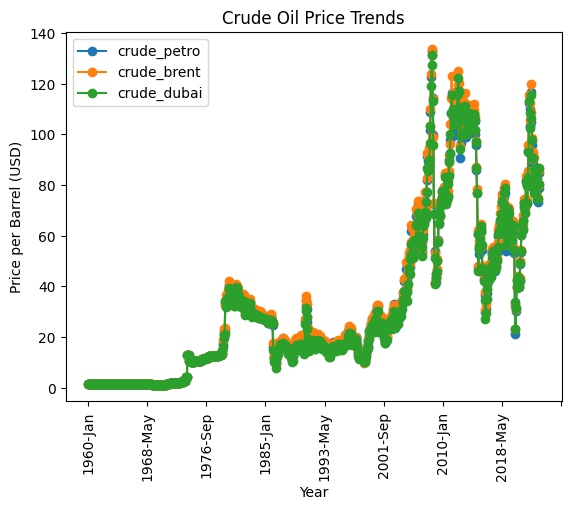

In [118]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(15, 6))
crudeoil_raw_df.plot(x='period', y=['crude_petro', 'crude_brent', 'crude_dubai'], marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Price per Barrel (USD)')
plt.title('Crude Oil Price Trends')
plt.legend(['crude_petro', 'crude_brent', 'crude_dubai'])
plt.show()